In [71]:
import numpy as np
import matplotlib.pyplot as plt

### Case 2: Critical Damping

In [72]:
#Importing the data
data = np.loadtxt(r"Exp32.csv",delimiter=",")

In [73]:
data

array([[-9.00000000e-04,  5.77979790e-02,  2.80836569e-01,
         3.62881988e+00, -6.67539576e-01,  1.70580898e+00],
       [-6.00000000e-04,  7.00079910e-02,  2.83889072e-01,
         3.62881988e+00, -9.39703180e-02,  9.44248754e-01],
       [-3.00000000e-04,  7.30604950e-02,  2.77784066e-01,
         3.62881988e+00,  4.61736281e-01,  3.92015924e-01],
       ...,
       [ 9.84000000e-02,  8.95793000e-03, -3.04621500e-03,
         5.43388100e-02,  9.97055343e-01, -3.48000000e-25],
       [ 9.87000000e-02, -1.99579000e-04, -6.09871800e-03,
         6.04438160e-02,  9.84361815e-01, -2.90000000e-25],
       [ 9.90000000e-02,  8.95793000e-03, -3.04621500e-03,
         5.73913130e-02,  9.71821009e-01, -2.41000000e-25]])

$Column 1:$ Time (s) \\\
$Column 2:$ Potential across the Inductor (V) \\\
$Column 3:$ Potential across the Resistor (V) \\\
$Column 4:$ Potential across the Capacitor (V) \\

In [74]:
#Separating the columns into each data variable
time = data[:,0]
V_I = data[:,1]
V_R = data[:,2]
V_C = data[:,3]

In [75]:
#Constants
R_res = 480.1 #in Ohm's
L = 1.031 #in Henry
C = 10.10e-6 #in Farad's
R = 639 #in Ohm's

In [76]:
#Applying the respective formulas for calculating the individual component energy
E_L = 0.5  * L * np.square(V_R/R_res) #in Joules
E_C = 0.5 * C * np.square(V_C) #in Joules
E_T = E_C + E_L #in Joules

In [77]:
delta_t = [] #Every data point will have units second
i_avg = [] #Will be in Amperes
for i in range(len(time)):
    #Taking the change in time for very small intervals
    if i == 0:
        change_t = time[i]
        #Finding the first average current using Ohm's Law
        i_i = (V_R[i] / R_res) ** 2
    else:
        change_t = time[i] - time[i-1]
        #Taking the average in between the two points
        avg = (V_R[i] + V_R[i-1])/2
        #Applying Ohm's Law
        i_i = (avg/R_res) ** 2
    delta_t.append(change_t)
    i_avg.append(i_i)

In [78]:
ht = [] #in Joule's
#Applying the equation for heat energy for each element and adding it to E_HT
for i,j in zip(delta_t,i_avg):
    ht.append(R * i * j)

In [79]:
E_cons = [] #List for the conservative energy values; has unit Joule's
E_HT = [] #List for the sum of heat energy values; has unit Joule's
tot = 0 #Represents the sum for the heat energy
#Applying the equation for the conservative energy
for k,l in zip(E_T, ht):
    tot += l
    E_HT.append(tot)
    E_cons.append(k + tot)

Text(0, 0.5, 'Energy (J)')

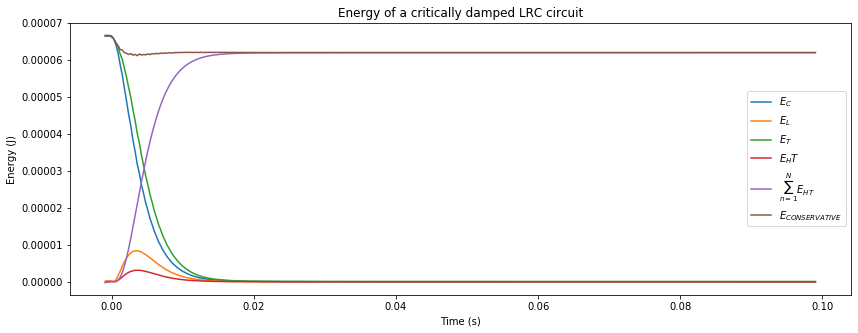

In [87]:
plt.figure(figsize = (14,5))
plt.plot(time,E_C, label = "$E_C$")
plt.plot(time,E_L, label = "$E_L$")
plt.plot(time,E_T, label = "$E_T$")
plt.plot(time, ht, label = "$E_HT$")
plt.plot(time,E_HT, label = "$\sum_{n=1}^{N} E_{HT}$")
plt.plot(time,E_cons, label = "$E_{CONSERVATIVE}$")
plt.legend()
plt.title("Energy of a critically damped LRC circuit")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
#plt.xlim(0,0.02)

### Case 3: Oscillatory Damping

In [88]:
#Importing the data
data = np.loadtxt(r"Exp32_Case3.csv",delimiter=",")

In [89]:
data

array([[-9.00000000e-04,  9.19855130e-02,  2.01538100e-02,
         3.86365929e+00],
       [-6.00000000e-04,  7.06179910e-02,  7.94379700e-03,
         3.86365929e+00],
       [-3.00000000e-04,  9.19855130e-02,  2.01538100e-02,
         3.85450178e+00],
       ...,
       [ 9.84000000e-02,  6.51542700e-03, -1.21371200e-03,
         5.71879790e-02],
       [ 9.87000000e-02,  6.51542700e-03,  1.83879100e-03,
         5.10829730e-02],
       [ 9.90000000e-02,  3.46292400e-03, -1.21371200e-03,
         5.41354760e-02]])

$Column 1:$ Time (s) \\\
$Column 2:$ Potential across the Inductor (V) \\\
$Column 3:$ Potential across the Resistor (V) \\\
$Column 4:$ Potential across the Capacitor (V) \\

In [90]:
#Separating the columns into each data variable
time = data[:,0]
V_I = data[:,1]
V_R = data[:,2]
V_C = data[:,3]

In [91]:
#Constants
R_res = 15.0 #in Ohm's
L = 1.031 #in Henry
C = 10.10e-6 #in Farad's
R = 173.9 #in Ohm's

In [92]:
#Applying the respective formulas for calculating the individual component energy
E_L = 0.5  * L * np.square(V_R/R_res) #in Joules
E_C = 0.5 * C * np.square(V_C) #in Joules
E_T = E_C + E_L #in Joules

In [93]:
delta_t = [] #Every data point will have units second
i_avg = [] #Will be in Amperes
for i in range(len(time)):
    #Taking the change in time for very small intervals
    if i == 0:
        change_t = time[i]
        #Finding the first average current using Ohm's Law
        i_i = (V_R[i] / R_res) ** 2
    else:
        change_t = time[i] - time[i-1]
        #Taking the average in between the two points
        avg = (V_R[i] + V_R[i-1])/2
        #Applying Ohm's Law
        i_i = (avg/R_res) ** 2
    delta_t.append(change_t)
    i_avg.append(i_i)

In [94]:
ht = [] #in Joule's
#Applying the equation for heat energy for each element and adding it to E_HT
for i,j in zip(delta_t,i_avg):
    ht.append(R * i * j)

In [95]:
E_cons = [] #List for the conservative energy values; has unit Joule's
E_HT = [] #List for the sum of heat energy values; has unit Joule's
tot = 0 #Represents the sum for the heat energy
#Applying the equation for the conservative energy
for k,l in zip(E_T, ht):
    tot += l
    E_HT.append(tot)
    E_cons.append(k + tot)

Text(0, 0.5, 'Energy (J)')

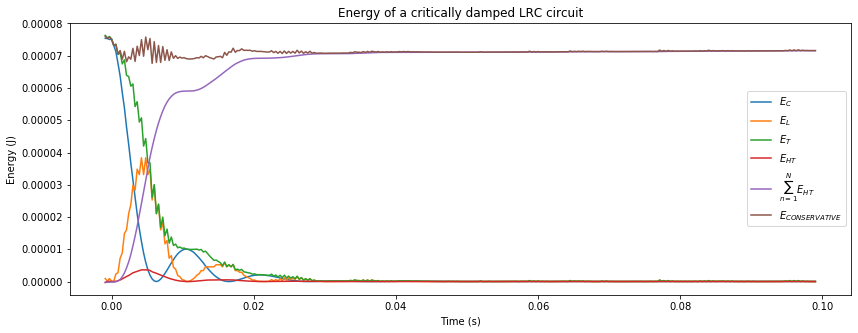

In [96]:
plt.figure(figsize = (14,5))
plt.plot(time,E_C, label = "$E_C$")
plt.plot(time,E_L, label = "$E_L$")
plt.plot(time,E_T, label = "$E_T$")
plt.plot(time,ht, label = "$E_{HT}$")
plt.plot(time,E_HT, label = "$\sum_{n=1}^{N} E_{HT}$")
plt.plot(time,E_cons, label = "$E_{CONSERVATIVE}$")
plt.legend()
plt.title("Energy of a critically damped LRC circuit")
plt.xlabel("Time (s)")
plt.ylabel("Energy (J)")
#plt.xlim(0,0.02)